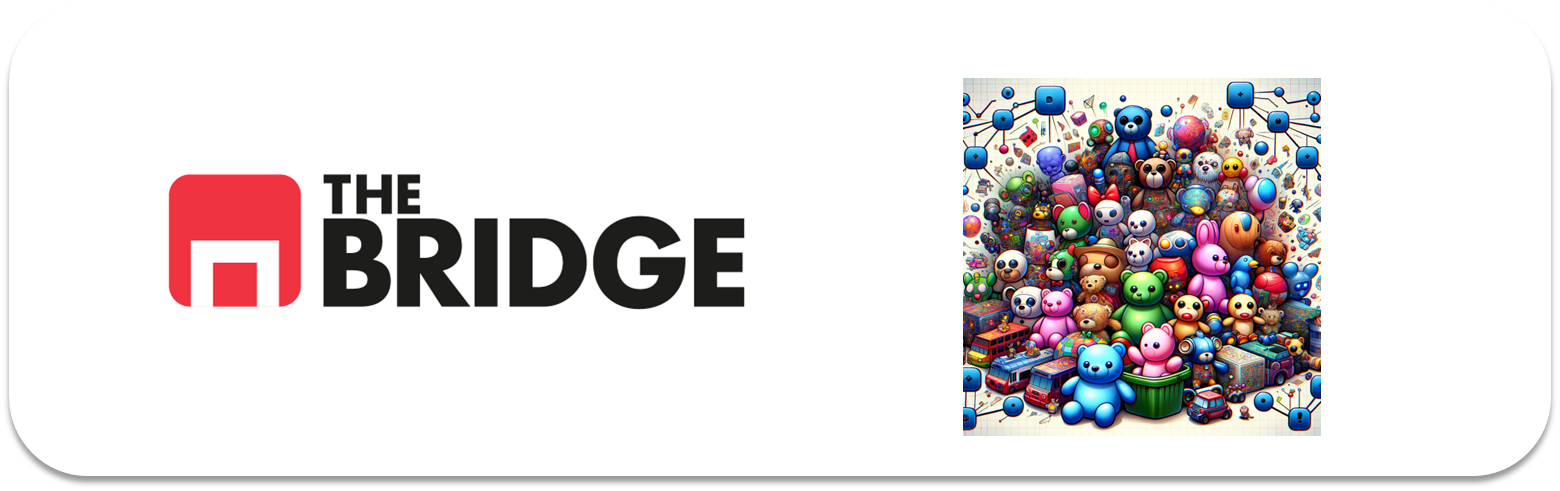

## PRACTICA OBLIGATORIA: **DBSCAN y Clustering Jerárquico**

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [2]:
# Cargar datos
df = pd.read_csv('data/empowering_drinks.csv', delimiter='|')

In [3]:
print(df.head())


   Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina
0  1.518613               0.232053  1.034819       1.013009  0.251717
1  0.246290              -0.827996  0.733629       0.965242 -0.293321
2  0.196879               1.109334  1.215533       1.395148  0.269020
3  1.691550               0.487926  1.466525       2.334574  1.186068
4  0.295700               1.840403  0.663351      -0.037874 -0.319276


In [4]:
print(df.tail())

     Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina
148  0.493343               0.414820 -1.284344       0.009893  0.969783
149  0.332758              -0.389355 -1.344582       0.280575  2.224236
150  0.209232               0.012732 -1.354622       0.296498  1.834923
151  1.395086               1.365208 -1.274305      -0.595160  1.791666
152  0.019564               0.039106 -1.500000       0.081020  0.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [6]:
print(df.describe())

         Azúcares  Vitamínas del grupo B     Cafeína  Ácido Cítrico  \
count  153.000000             153.000000  153.000000     153.000000   
mean     0.019231               0.037273    0.041057       0.080022   
std      1.026182               0.995984    1.040928       1.009450   
min     -2.434235              -3.679162   -1.695971      -1.493188   
25%     -0.816038              -0.499016   -1.043392      -0.738463   
50%      0.061000              -0.023821    0.211566      -0.165254   
75%      0.876275               0.707247    0.894264       0.917474   
max      2.259772               3.156325    3.062832       2.971473   

          Taurina  
count  153.000000  
mean    -0.044088  
std      0.934399  
min     -1.634288  
25%     -0.799428  
50%     -0.154899  
75%      0.493956  
max      2.431870  


In [7]:
# Verificar nulos
print(f"\n VALORES NULOS:")
nulos = df.isnull().sum()
if nulos.sum() == 0:
    print("    No hay valores nulos")
else:
    print(nulos[nulos > 0])



 VALORES NULOS:
    No hay valores nulos


In [8]:
# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"\n FILAS DUPLICADAS: {duplicados}")
if duplicados > 0:
    print(f"    Hay {duplicados} filas duplicadas")
else:
    print("    No hay filas duplicadas")


 FILAS DUPLICADAS: 0
    No hay filas duplicadas


In [13]:
# Rangos de valores
print(f"\n RANGOS DE VALORES POR COMPONENTE:")
for col in df.columns:
    print(f"   {col:20s}: [{df[col].min():8.2f}, {df[col].max():8.2f}] | Media: {df[col].mean():8.2f}")




 RANGOS DE VALORES POR COMPONENTE:
   Azúcares            : [   -2.43,     2.26] | Media:     0.02
   Vitamínas del grupo B: [   -3.68,     3.16] | Media:     0.04
   Cafeína             : [   -1.70,     3.06] | Media:     0.04
   Ácido Cítrico       : [   -1.49,     2.97] | Media:     0.08
   Taurina             : [   -1.63,     2.43] | Media:    -0.04


In [14]:
# Verificar si escalas son muy diferentes
print(f"\n COMPARACIÓN DE ESCALAS:")
ranges = df.max() - df.min()
print(f"   Rango mínimo: {ranges.min():.4f}")
print(f"   Rango máximo: {ranges.max():.4f}")
print(f"   Ratio: {ranges.max() / ranges.min():.2f}x")

if ranges.max() / ranges.min() > 10:
    print(f"    ESCALAS MUY DIFERENTES → Necesario ESCALAR")
else:
    print(f"    Escalas relativamente similares")


 COMPARACIÓN DE ESCALAS:
   Rango mínimo: 4.0662
   Rango máximo: 6.8355
   Ratio: 1.68x
    Escalas relativamente similares



 VISUALIZACIÓN DE DISTRIBUCIONES:


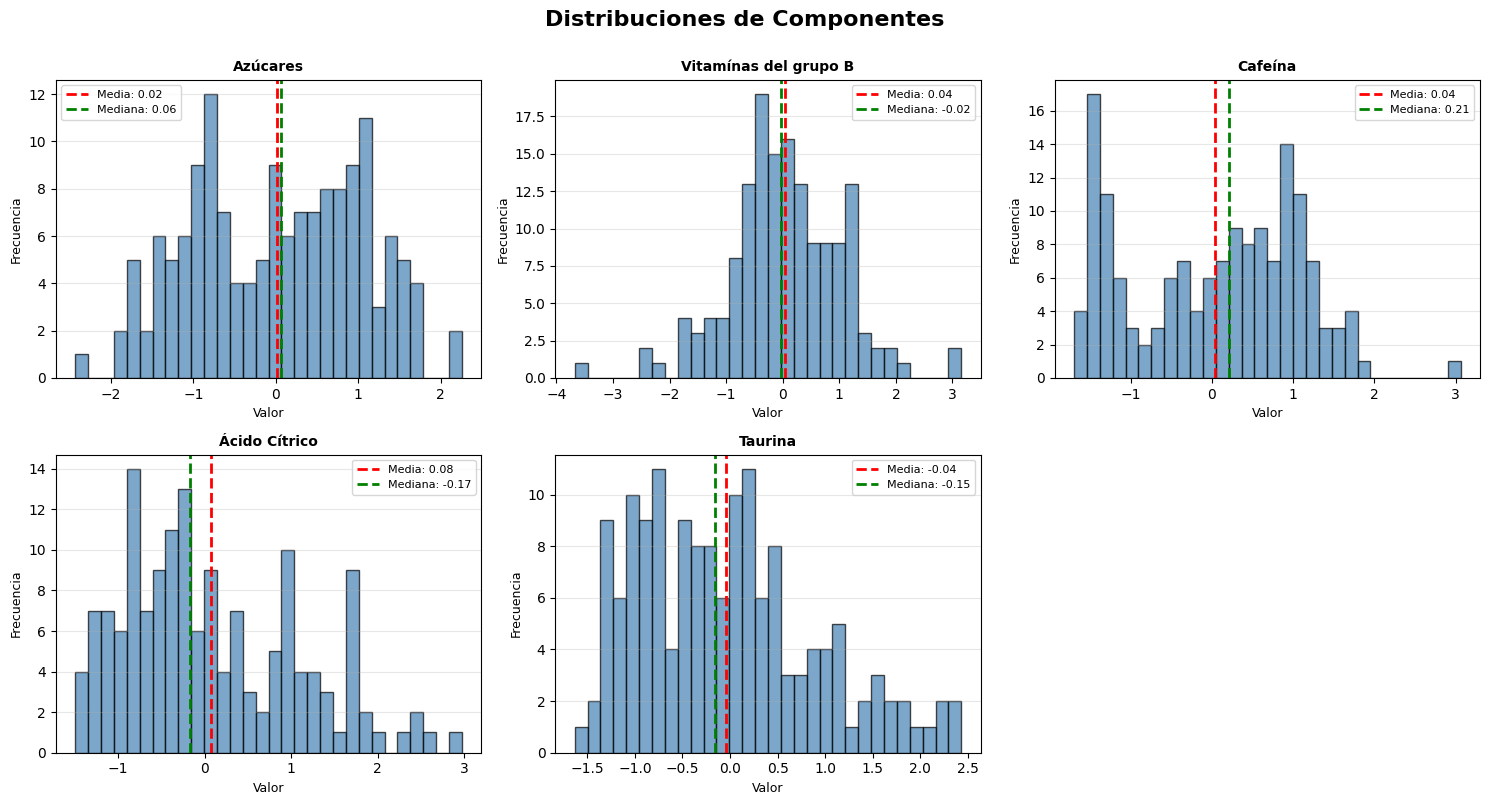

In [15]:
# Distribuciones
print(f"\n VISUALIZACIÓN DE DISTRIBUCIONES:")

n_cols = df.shape[1]
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[i].set_title(col, fontweight='bold', fontsize=10)
    axes[i].set_xlabel('Valor', fontsize=9)
    axes[i].set_ylabel('Frecuencia', fontsize=9)
    axes[i].grid(alpha=0.3, axis='y')
    
    # Añadir media y mediana
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Media: {df[col].mean():.2f}')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', 
                   linewidth=2, label=f'Mediana: {df[col].median():.2f}')
    axes[i].legend(fontsize=8)

for i in range(len(df.columns), len(axes)):
    axes[i].axis('off')

plt.suptitle('Distribuciones de Componentes', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


In [11]:
print("PASO 4: MATRIZ DE CORRELACIÓN")


# Calcular correlaciones
corr_matrix = df.corr()

print(f"\n Matriz de correlación:")
print(corr_matrix)


PASO 4: MATRIZ DE CORRELACIÓN

 Matriz de correlación:
                       Azúcares  Vitamínas del grupo B   Cafeína  \
Azúcares               1.000000               0.174354  0.258166   
Vitamínas del grupo B  0.174354               1.000000  0.155276   
Cafeína                0.258166               0.155276  1.000000   
Ácido Cítrico          0.672969               0.208444  0.497329   
Taurina                0.553245               0.215869 -0.124157   

                       Ácido Cítrico   Taurina  
Azúcares                    0.672969  0.553245  
Vitamínas del grupo B       0.208444  0.215869  
Cafeína                     0.497329 -0.124157  
Ácido Cítrico               1.000000  0.408325  
Taurina                     0.408325  1.000000  


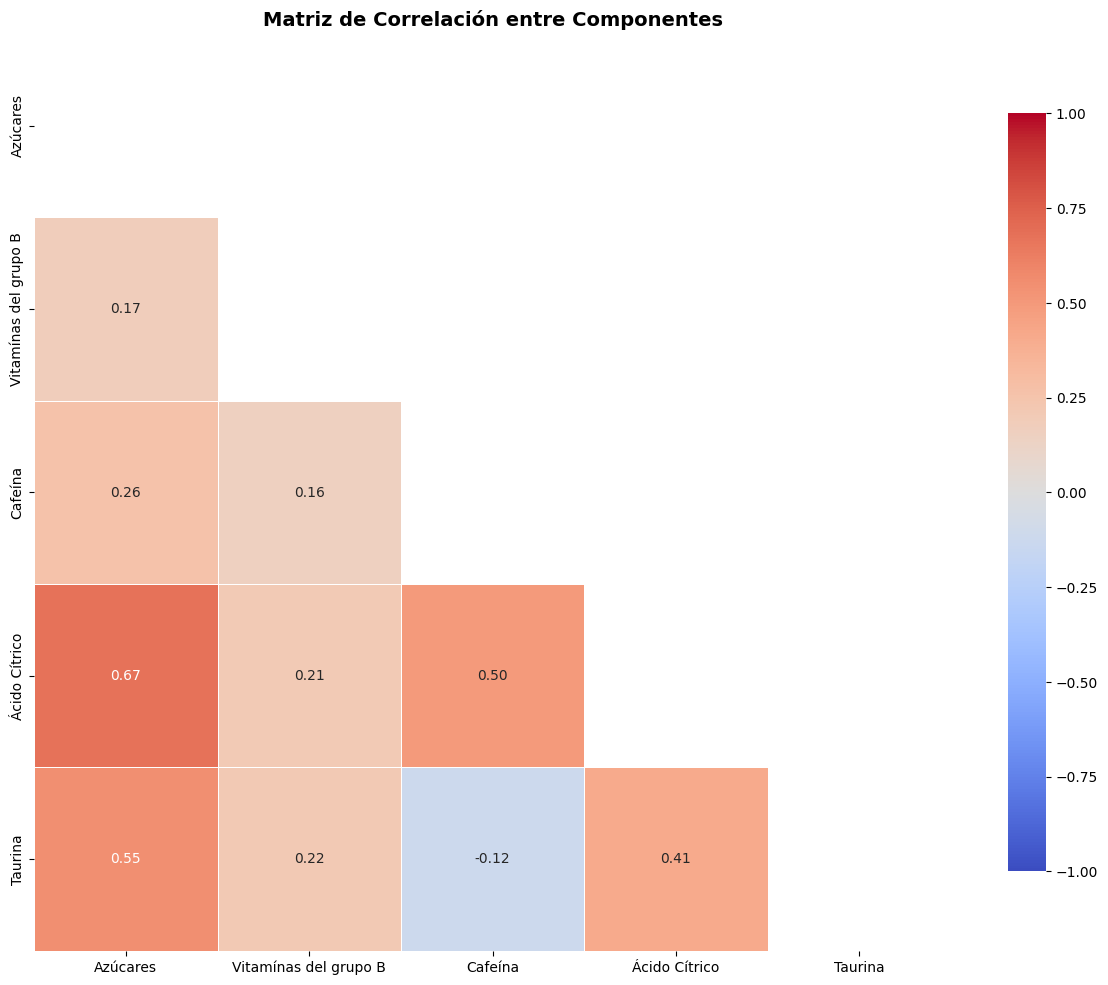

In [16]:
# Visualizar
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Máscara triangular superior
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Componentes', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

In [17]:
# Encontrar correlaciones altas
print(f"\n PARES CON CORRELACIÓN ALTA (|r| > 0.7):")

correlaciones_altas = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            comp1 = corr_matrix.columns[i]
            comp2 = corr_matrix.columns[j]
            correlaciones_altas.append((comp1, comp2, corr_val))
            print(f"   {comp1:25s} <-> {comp2:25s}: {corr_val:6.3f}")

if len(correlaciones_altas) == 0:
    print("    No hay correlaciones muy altas (|r| > 0.7)")


 PARES CON CORRELACIÓN ALTA (|r| > 0.7):
    No hay correlaciones muy altas (|r| > 0.7)


In [18]:
# Encontrar correlaciones moderadas
print(f"\n PARES CON CORRELACIÓN MODERADA (0.5 < |r| < 0.7):")

correlaciones_moderadas = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if 0.5 < abs(corr_val) <= 0.7:
            comp1 = corr_matrix.columns[i]
            comp2 = corr_matrix.columns[j]
            correlaciones_moderadas.append((comp1, comp2, corr_val))

if len(correlaciones_moderadas) > 0:
    # Mostrar solo las 5 más altas
    correlaciones_moderadas.sort(key=lambda x: abs(x[2]), reverse=True)
    for comp1, comp2, corr_val in correlaciones_moderadas[:5]:
        print(f"   {comp1:25s} <-> {comp2:25s}: {corr_val:6.3f}")
else:
    print("   No hay correlaciones moderadas")


 PARES CON CORRELACIÓN MODERADA (0.5 < |r| < 0.7):
   Azúcares                  <-> Ácido Cítrico            :  0.673
   Azúcares                  <-> Taurina                  :  0.553


In [20]:
print("PASO 6: VISUALIZACIÓN DE FEATURES 2 A 2")
# Crear scatterplot matrix
fig = plt.figure(figsize=(16, 16))
cols = df.columns
n_features = len(cols)


PASO 6: VISUALIZACIÓN DE FEATURES 2 A 2


<Figure size 1600x1600 with 0 Axes>

In [21]:
# Generar todas las combinaciones 2 a 2
combinations = list(itertools.combinations(range(n_features), 2))
n_plots = len(combinations)

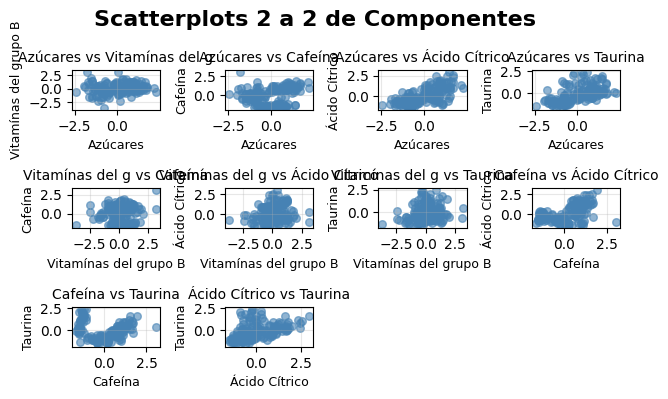

In [22]:
# Calcular grid
grid_size = int(np.ceil(np.sqrt(n_plots)))

for idx, (i, j) in enumerate(combinations, 1):
    ax = plt.subplot(grid_size, grid_size, idx)
    
    # Scatterplot
    ax.scatter(df.iloc[:, i], df.iloc[:, j], alpha=0.6, s=30, color='steelblue')
    ax.set_xlabel(cols[i], fontsize=9)
    ax.set_ylabel(cols[j], fontsize=9)
    ax.set_title(f'{cols[i][:15]} vs {cols[j][:15]}', fontsize=10)
    ax.grid(alpha=0.3)

plt.suptitle('Scatterplots 2 a 2 de Componentes', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


 SCATTERPLOTS DESTACADOS:


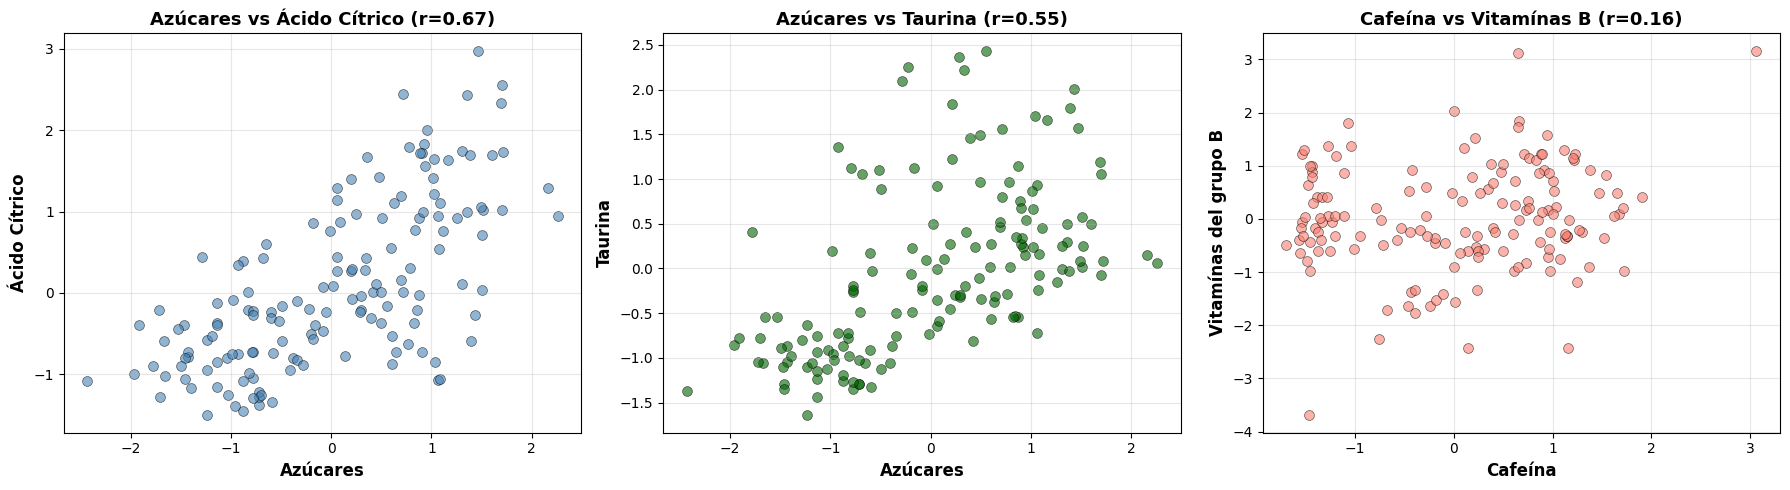

In [23]:
# Scatterplot más grande de las 3 mejores combinaciones
print(f"\n SCATTERPLOTS DESTACADOS:")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Combinación 1: Azúcares vs Ácido Cítrico (correlación más alta)
axes[0].scatter(df['Azúcares'], df['Ácido Cítrico'], 
               alpha=0.6, s=50, color='steelblue', edgecolor='black', linewidth=0.5)
axes[0].set_xlabel('Azúcares', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Ácido Cítrico', fontweight='bold', fontsize=12)
axes[0].set_title('Azúcares vs Ácido Cítrico (r=0.67)', fontweight='bold', fontsize=13)
axes[0].grid(alpha=0.3)

# Combinación 2: Azúcares vs Taurina
axes[1].scatter(df['Azúcares'], df['Taurina'], 
               alpha=0.6, s=50, color='darkgreen', edgecolor='black', linewidth=0.5)
axes[1].set_xlabel('Azúcares', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Taurina', fontweight='bold', fontsize=12)
axes[1].set_title('Azúcares vs Taurina (r=0.55)', fontweight='bold', fontsize=13)
axes[1].grid(alpha=0.3)

# Combinación 3: Cafeína vs Vitaminas B
axes[2].scatter(df['Cafeína'], df['Vitamínas del grupo B'], 
               alpha=0.6, s=50, color='salmon', edgecolor='black', linewidth=0.5)
axes[2].set_xlabel('Cafeína', fontweight='bold', fontsize=12)
axes[2].set_ylabel('Vitamínas del grupo B', fontweight='bold', fontsize=12)
axes[2].set_title('Cafeína vs Vitamínas B (r=0.16)', fontweight='bold', fontsize=13)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [26]:
# Usar todas las features
X = df.values.copy()

print(f"\n FEATURES SELECCIONADAS:")
print(f"   X shape: {X.shape}")
print(f"   Features: {list(df.columns)}")
print(f"   Todos los componentes (5)")

print(f"\n VERIFICACIÓN DE ESCALADO:")
print(f"   Medias por componente:")
for i, col in enumerate(df.columns):
    print(f"      {col:25s}: {X[:, i].mean():8.4f}")

print(f"\n   Desviaciones estándar:")
for i, col in enumerate(df.columns):
    print(f"      {col:25s}: {X[:, i].std():8.4f}")




 FEATURES SELECCIONADAS:
   X shape: (153, 5)
   Features: ['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina']
   Todos los componentes (5)

 VERIFICACIÓN DE ESCALADO:
   Medias por componente:
      Azúcares                 :   0.0192
      Vitamínas del grupo B    :   0.0373
      Cafeína                  :   0.0411
      Ácido Cítrico            :   0.0800
      Taurina                  :  -0.0441

   Desviaciones estándar:
      Azúcares                 :   1.0228
      Vitamínas del grupo B    :   0.9927
      Cafeína                  :   1.0375
      Ácido Cítrico            :   1.0061
      Taurina                  :   0.9313


DATOS:
  • Mezclas: 153
  • Features: 5 (Azúcares, Vitaminas B, Cafeína, Ácido Cítrico, Taurina)
  • Escalado:  (media ≈ 0, std ≈ 1)
  • Nulos:  Ninguno
  • Outliers: Algunos visibles (normales en datos reales)

CORRELACIONES:
  • Moderadas (0.5-0.7): 2 pares
  • Altas (>0.7): Ninguna
  • Conclusión: Features independientes

OBSERVACIONES VISUALES:
  • NO hay clusters extremadamente obvios
  • Distribuciones relativamente continuas
  • Densidad variable en diferentes regiones

 PRÓXIMOS PASOS:

1. DBSCAN (Density-Based Clustering)
   • Probar diferentes eps y min_samples
   • Objetivo: 3-5 clusters según requisito

2. HIERARCHICAL CLUSTERING (Agglomerative)
   • Dendrograma para ver jerarquía
   • Probar different linkage methods
   • Cortar en 3-5 clusters

3. COMPARACIÓN
   • Silhouette Score
   • Davies-Bouldin Index
   • Visualización con PCA
   • Interpretabilidad química

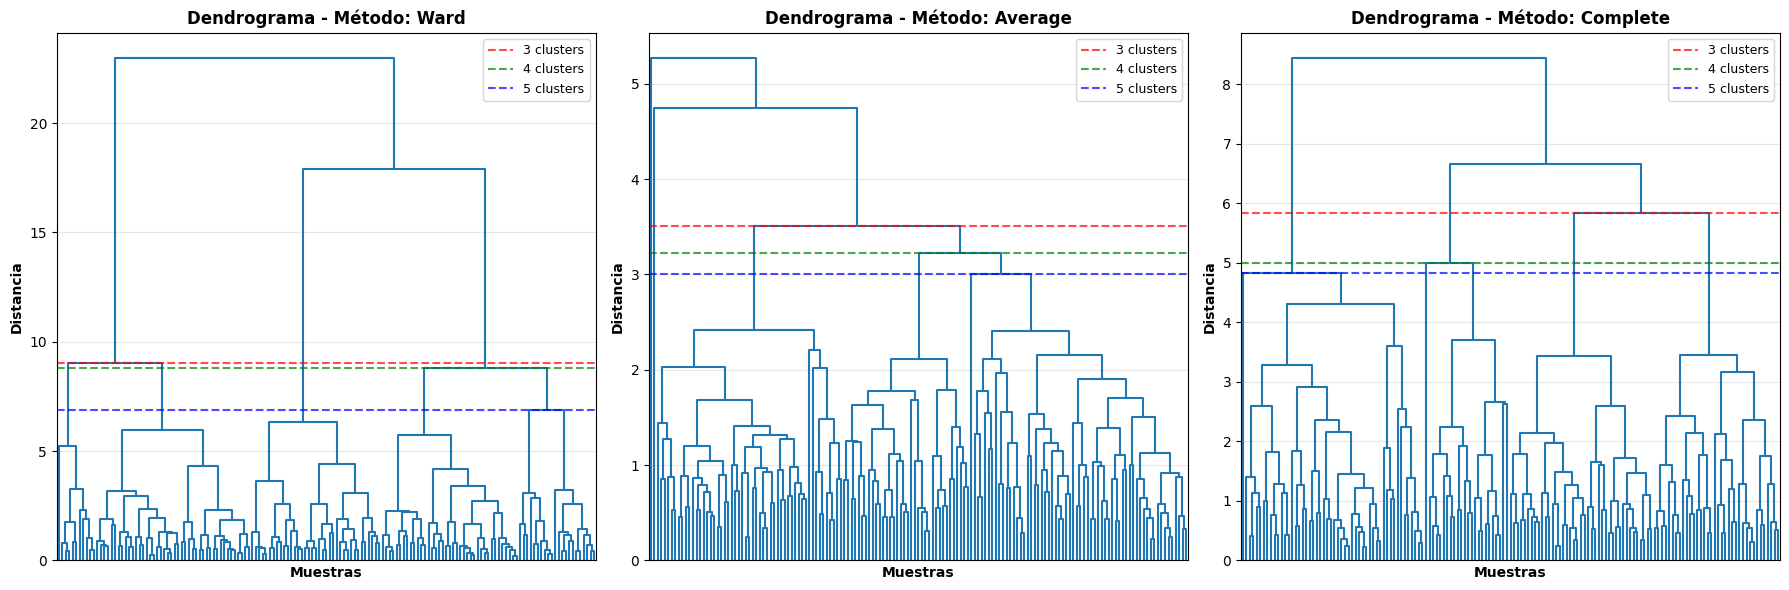

In [28]:
# Calcular linkage con diferentes métodos
methods = ['ward', 'average', 'complete']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, method in enumerate(methods):
    # Calcular linkage
    Z = linkage(X, method=method)
    
    # Dendrograma
    dendrogram(Z, ax=axes[idx], no_labels=True, color_threshold=0)
    axes[idx].set_title(f'Dendrograma - Método: {method.capitalize()}', 
                       fontweight='bold', fontsize=12)
    axes[idx].set_xlabel('Muestras', fontweight='bold')
    axes[idx].set_ylabel('Distancia', fontweight='bold')
    axes[idx].grid(alpha=0.3, axis='y')
    
    # Líneas horizontales para 3, 4, 5 clusters
    heights = [Z[-3, 2], Z[-4, 2], Z[-5, 2]]  # Alturas para 3, 4, 5 clusters
    colors = ['red', 'green', 'blue']
    labels = ['3 clusters', '4 clusters', '5 clusters']
    
    for h, c, l in zip(heights, colors, labels):
        axes[idx].axhline(y=h, color=c, linestyle='--', linewidth=1.5, 
                         alpha=0.7, label=l)
    
    axes[idx].legend(fontsize=9)

plt.tight_layout()
plt.show()



 DENDROGRAMA DETALLADO (Ward):


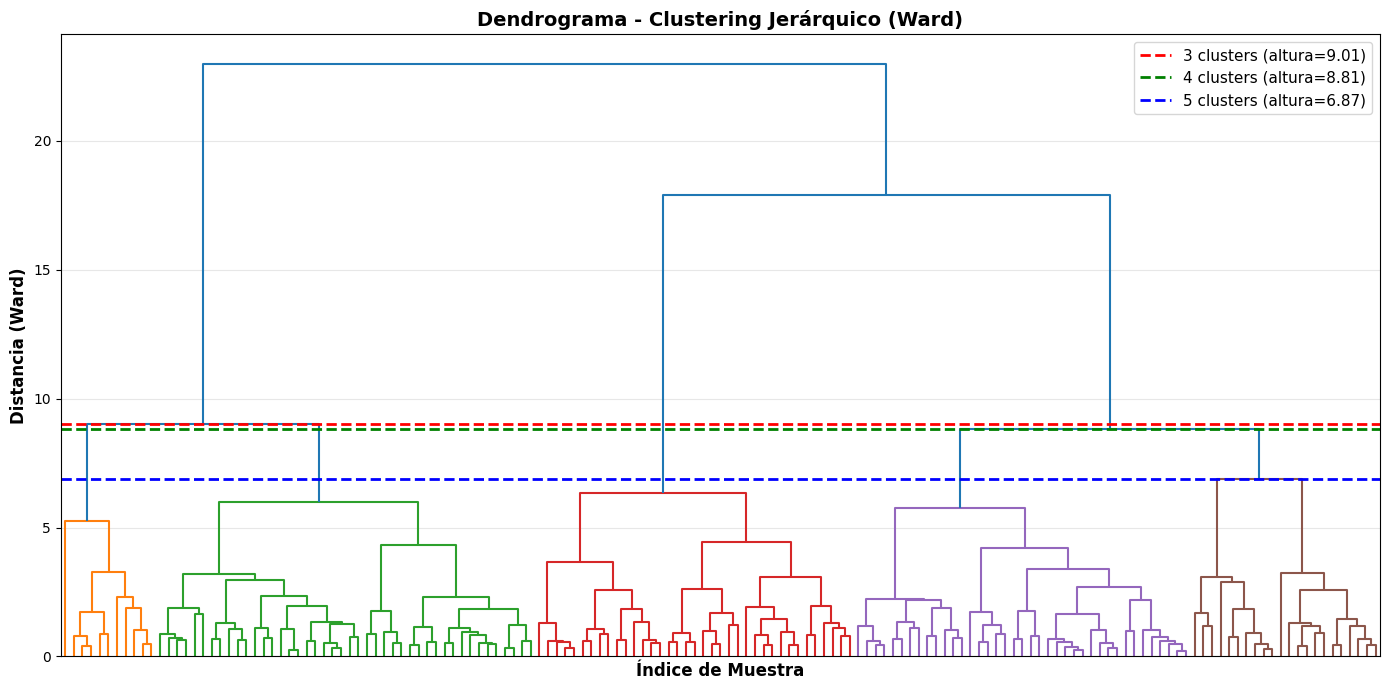

In [31]:
# Dendrograma detallado con ward (el más común)
print(f"\n DENDROGRAMA DETALLADO (Ward):")

plt.figure(figsize=(14, 7))
Z_ward = linkage(X, method='ward')

# Dendrograma con más detalle
dendrogram(Z_ward, no_labels=True, leaf_font_size=8, color_threshold=Z_ward[-4, 2])
plt.title('Dendrograma - Clustering Jerárquico (Ward)', fontweight='bold', fontsize=14)
plt.xlabel('Índice de Muestra', fontweight='bold', fontsize=12)
plt.ylabel('Distancia (Ward)', fontweight='bold', fontsize=12)

# Líneas de corte
plt.axhline(y=Z_ward[-3, 2], color='red', linestyle='--', linewidth=2, 
           label=f'3 clusters (altura={Z_ward[-3, 2]:.2f})')
plt.axhline(y=Z_ward[-4, 2], color='green', linestyle='--', linewidth=2, 
           label=f'4 clusters (altura={Z_ward[-4, 2]:.2f})')
plt.axhline(y=Z_ward[-5, 2], color='blue', linestyle='--', linewidth=2, 
           label=f'5 clusters (altura={Z_ward[-5, 2]:.2f})')

plt.legend(fontsize=11)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [32]:
# Configuraciones a probar
n_clusters_list = [3, 4, 5]
linkage_methods = ['ward', 'average', 'complete']

resultados_hierarchical = []

print("\n Probando diferentes configuraciones...\n")

for n_clusters in n_clusters_list:
    for linkage_method in linkage_methods:
        
        # Entrenar modelo
        hc = AgglomerativeClustering(
            n_clusters=n_clusters,
            linkage=linkage_method
        )
        
        labels = hc.fit_predict(X)
        
        # Calcular métricas
        silhouette = silhouette_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        
        # Guardar resultados
        resultados_hierarchical.append({
            'n_clusters': n_clusters,
            'linkage': linkage_method,
            'silhouette': silhouette,
            'davies_bouldin': davies_bouldin,
            'labels': labels
        })
        
        print(f"   n_clusters={n_clusters}, linkage={linkage_method:8s} → "
              f"Silhouette={silhouette:.4f}, Davies-Bouldin={davies_bouldin:.4f}")

print("\n Pruebas completadas")


 Probando diferentes configuraciones...

   n_clusters=3, linkage=ward     → Silhouette=0.3843, Davies-Bouldin=0.9852
   n_clusters=3, linkage=average  → Silhouette=0.2975, Davies-Bouldin=0.4691
   n_clusters=3, linkage=complete → Silhouette=0.1896, Davies-Bouldin=1.5387
   n_clusters=4, linkage=ward     → Silhouette=0.3369, Davies-Bouldin=1.1027
   n_clusters=4, linkage=average  → Silhouette=0.2894, Davies-Bouldin=0.7884
   n_clusters=4, linkage=complete → Silhouette=0.3185, Davies-Bouldin=1.2174
   n_clusters=5, linkage=ward     → Silhouette=0.3037, Davies-Bouldin=1.2648
   n_clusters=5, linkage=average  → Silhouette=0.3618, Davies-Bouldin=0.7282
   n_clusters=5, linkage=complete → Silhouette=0.3106, Davies-Bouldin=1.0470

 Pruebas completadas


In [33]:
# Convertir a DataFrame
df_results_hc = pd.DataFrame(resultados_hierarchical)

In [34]:
print(f"\n RESULTADOS ORDENADOS POR SILHOUETTE (mayor es mejor):")
print(df_results_hc.sort_values('silhouette', ascending=False)
      [['n_clusters', 'linkage', 'silhouette', 'davies_bouldin']].to_string(index=False))

print(f"\n RESULTADOS ORDENADOS POR DAVIES-BOULDIN (menor es mejor):")
print(df_results_hc.sort_values('davies_bouldin', ascending=True)
      [['n_clusters', 'linkage', 'silhouette', 'davies_bouldin']].to_string(index=False))


 RESULTADOS ORDENADOS POR SILHOUETTE (mayor es mejor):
 n_clusters  linkage  silhouette  davies_bouldin
          3     ward    0.384334        0.985192
          5  average    0.361799        0.728238
          4     ward    0.336875        1.102722
          4 complete    0.318503        1.217436
          5 complete    0.310577        1.046995
          5     ward    0.303653        1.264781
          3  average    0.297533        0.469106
          4  average    0.289377        0.788394
          3 complete    0.189607        1.538710

 RESULTADOS ORDENADOS POR DAVIES-BOULDIN (menor es mejor):
 n_clusters  linkage  silhouette  davies_bouldin
          3  average    0.297533        0.469106
          5  average    0.361799        0.728238
          4  average    0.289377        0.788394
          3     ward    0.384334        0.985192
          5 complete    0.310577        1.046995
          4     ward    0.336875        1.102722
          4 complete    0.318503        1.217436
  

In [35]:
# Seleccionar mejor modelo
best_idx = df_results_hc['silhouette'].idxmax()
best_hc = resultados_hierarchical[best_idx]

print(f"\n MEJOR CONFIGURACIÓN (Hierarchical):")
print(f"   n_clusters: {best_hc['n_clusters']}")
print(f"   linkage: {best_hc['linkage']}")
print(f"   Silhouette: {best_hc['silhouette']:.4f}")
print(f"   Davies-Bouldin: {best_hc['davies_bouldin']:.4f}")


 MEJOR CONFIGURACIÓN (Hierarchical):
   n_clusters: 3
   linkage: ward
   Silhouette: 0.3843
   Davies-Bouldin: 0.9852


In [36]:
# Re-entrenar con mejor configuración
best_hc_model = AgglomerativeClustering(
    n_clusters=best_hc['n_clusters'],
    linkage=best_hc['linkage']
)

labels_hc_best = best_hc_model.fit_predict(X)

print(f"\n DISTRIBUCIÓN DE CLUSTERS (mejor modelo):")
unique, counts = np.unique(labels_hc_best, return_counts=True)
for cluster_id, count in zip(unique, counts):
    pct = (count / len(X)) * 100
    print(f"   Cluster {cluster_id}: {count:3d} muestras ({pct:5.1f}%)")



 DISTRIBUCIÓN DE CLUSTERS (mejor modelo):
   Cluster 0:  55 muestras ( 35.9%)
   Cluster 1:  61 muestras ( 39.9%)
   Cluster 2:  37 muestras ( 24.2%)


In [39]:
print("PASO 9: DBSCAN (DENSITY-BASED CLUSTERING)")
# Calcular distancias a los k vecinos más cercanos
k = 4  # min_samples típicamente = k

neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

PASO 9: DBSCAN (DENSITY-BASED CLUSTERING)


In [40]:
# Distancias al k-ésimo vecino (última columna)
distances_k = np.sort(distances[:, k-1], axis=0)

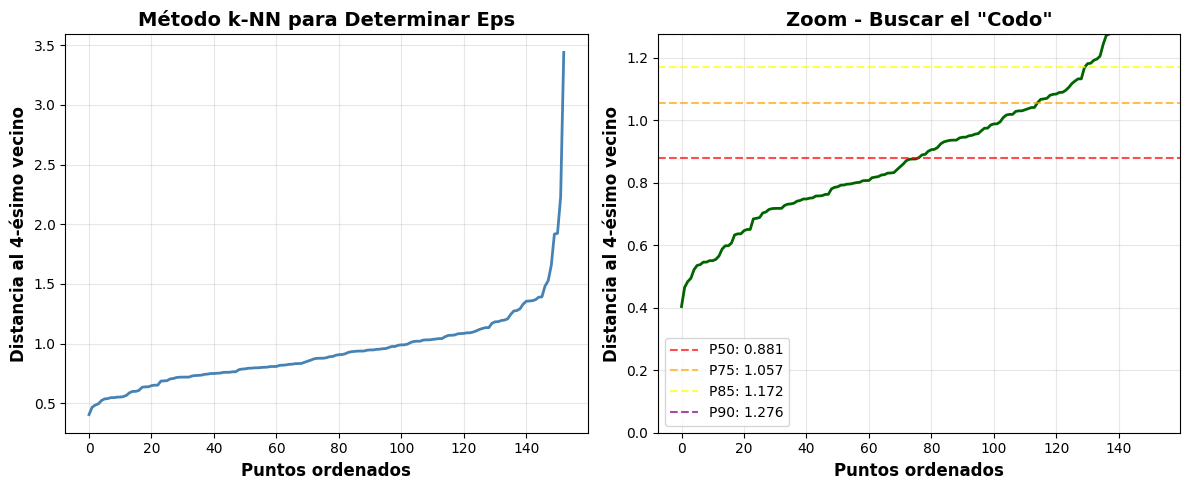


 VALORES CANDIDATOS DE EPS:
   Percentil 50 (mediana): 0.8808
   Percentil 75: 1.0570
   Percentil 85: 1.1717
   Percentil 90: 1.2756


In [42]:
# Visualizar
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(distances_k, linewidth=2, color='steelblue')
plt.xlabel('Puntos ordenados', fontweight='bold', fontsize=12)
plt.ylabel(f'Distancia al {k}-ésimo vecino', fontweight='bold', fontsize=12)
plt.title('Método k-NN para Determinar Eps', fontweight='bold', fontsize=14)
plt.grid(alpha=0.3)

# Zoom en la zona del codo
plt.subplot(1, 2, 2)
plt.plot(distances_k, linewidth=2, color='darkgreen')
plt.xlabel('Puntos ordenados', fontweight='bold', fontsize=12)
plt.ylabel(f'Distancia al {k}-ésimo vecino', fontweight='bold', fontsize=12)
plt.title('Zoom - Buscar el "Codo"', fontweight='bold', fontsize=14)
plt.ylim(0, np.percentile(distances_k, 90))  # Zoom al 90 percentil
plt.grid(alpha=0.3)

# Marcar posibles valores de eps
eps_candidates = [np.percentile(distances_k, p) for p in [50, 75, 85, 90]]
colors = ['red', 'orange', 'yellow', 'purple']
labels = ['P50', 'P75', 'P85', 'P90']

for eps_val, color, label in zip(eps_candidates, colors, labels):
    plt.axhline(y=eps_val, color=color, linestyle='--', linewidth=1.5, 
               alpha=0.7, label=f'{label}: {eps_val:.3f}')

plt.legend(fontsize=10)

plt.tight_layout()
plt.show()
print(f"\n VALORES CANDIDATOS DE EPS:")
print(f"   Percentil 50 (mediana): {eps_candidates[0]:.4f}")
print(f"   Percentil 75: {eps_candidates[1]:.4f}")
print(f"   Percentil 85: {eps_candidates[2]:.4f}")
print(f"   Percentil 90: {eps_candidates[3]:.4f}")

In [43]:
print("PASO 9.2: GRID SEARCH PARA DBSCAN")


# Configuraciones a probar
eps_values = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 2.0]
min_samples_values = [3, 4, 5, 6]

resultados_dbscan = []

print("\n Probando diferentes configuraciones de DBSCAN...\n")
print(f"{'eps':>6s} {'min_s':>6s} {'n_clust':>8s} {'noise':>6s} {'silhouette':>11s} {'davies_b':>10s}")
print("-" * 70)

for eps in eps_values:
    for min_samples in min_samples_values:
        
        # Entrenar DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        # Número de clusters (sin contar ruido = -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        # Solo calcular métricas si hay al menos 2 clusters
        if n_clusters >= 2:
            # Filtrar ruido para métricas
            mask = labels != -1
            if mask.sum() > 1:  # Al menos 2 puntos no-ruido
                try:
                    silhouette = silhouette_score(X[mask], labels[mask])
                    davies_bouldin = davies_bouldin_score(X[mask], labels[mask])
                except:
                    silhouette = np.nan
                    davies_bouldin = np.nan
            else:
                silhouette = np.nan
                davies_bouldin = np.nan
        else:
            silhouette = np.nan
            davies_bouldin = np.nan
        
        # Guardar resultados
        resultados_dbscan.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette': silhouette,
            'davies_bouldin': davies_bouldin,
            'labels': labels
        })
        
        # Imprimir solo si está en rango 3-5 clusters
        if 3 <= n_clusters <= 5:
            sil_str = f"{silhouette:.4f}" if not np.isnan(silhouette) else "   N/A"
            db_str = f"{davies_bouldin:.4f}" if not np.isnan(davies_bouldin) else "   N/A"
            print(f"{eps:6.2f} {min_samples:6d} {n_clusters:8d} {n_noise:6d} {sil_str:>11s} {db_str:>10s}")

print("\n Pruebas completadas")

PASO 9.2: GRID SEARCH PARA DBSCAN

 Probando diferentes configuraciones de DBSCAN...

   eps  min_s  n_clust  noise  silhouette   davies_b
----------------------------------------------------------------------
  0.50      4        3    140      0.6214     0.4820
  0.70      5        3    122      0.6148     0.5642
  0.90      5        5     54      0.3715     0.8827
  0.90      6        3     72      0.5695     0.6269
  1.10      6        3     14      0.4271     0.9138

 Pruebas completadas


In [44]:
# Convertir a DataFrame
df_results_dbscan = pd.DataFrame(resultados_dbscan)

In [45]:
# Filtrar solo resultados válidos (3-5 clusters, sin NaN)
df_valid_dbscan = df_results_dbscan[
    (df_results_dbscan['n_clusters'] >= 3) & 
    (df_results_dbscan['n_clusters'] <= 5) &
    (~df_results_dbscan['silhouette'].isna())
].copy()

if len(df_valid_dbscan) > 0:
    print(f"\n MEJORES CONFIGURACIONES (3-5 clusters, ordenadas por Silhouette):")
    print(df_valid_dbscan.sort_values('silhouette', ascending=False)
          [['eps', 'min_samples', 'n_clusters', 'n_noise', 'silhouette', 'davies_bouldin']]
          .head(10).to_string(index=False))
    
    # Seleccionar mejor
    best_idx_dbscan = df_valid_dbscan['silhouette'].idxmax()
    best_dbscan = resultados_dbscan[best_idx_dbscan]
    
    print(f"\n MEJOR CONFIGURACIÓN (DBSCAN):")
    print(f"   eps: {best_dbscan['eps']}")
    print(f"   min_samples: {best_dbscan['min_samples']}")
    print(f"   n_clusters: {best_dbscan['n_clusters']}")
    print(f"   n_noise (outliers): {best_dbscan['n_noise']}")
    print(f"   Silhouette: {best_dbscan['silhouette']:.4f}")
    print(f"   Davies-Bouldin: {best_dbscan['davies_bouldin']:.4f}")
    
    # Re-entrenar con mejor configuración
    best_dbscan_model = DBSCAN(
        eps=best_dbscan['eps'],
        min_samples=best_dbscan['min_samples']
    )
    
    labels_dbscan_best = best_dbscan_model.fit_predict(X)
    
    print(f"\n DISTRIBUCIÓN DE CLUSTERS (mejor DBSCAN):")
    unique, counts = np.unique(labels_dbscan_best, return_counts=True)
    for cluster_id, count in zip(unique, counts):
        pct = (count / len(X)) * 100
        if cluster_id == -1:
            print(f"   Ruido/Outliers: {count:3d} muestras ({pct:5.1f}%)")
        else:
            print(f"   Cluster {cluster_id}: {count:3d} muestras ({pct:5.1f}%)")
    
else:
    print("\n NO se encontraron configuraciones válidas con 3-5 clusters")
    print("   Probando con rango más amplio...")
    
    # Probar eps más grandes
    eps_values_extended = [2.5, 3.0, 3.5, 4.0]
    
    for eps in eps_values_extended:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)
            
            if 3 <= n_clusters <= 5:
                print(f"   eps={eps}, min_samples={min_samples} → {n_clusters} clusters, {n_noise} ruido")


 MEJORES CONFIGURACIONES (3-5 clusters, ordenadas por Silhouette):
 eps  min_samples  n_clusters  n_noise  silhouette  davies_bouldin
 0.5            4           3      140    0.621436        0.481966
 0.7            5           3      122    0.614797        0.564232
 0.9            6           3       72    0.569541        0.626922
 1.1            6           3       14    0.427146        0.913835
 0.9            5           5       54    0.371509        0.882687

 MEJOR CONFIGURACIÓN (DBSCAN):
   eps: 0.5
   min_samples: 4
   n_clusters: 3
   n_noise (outliers): 140
   Silhouette: 0.6214
   Davies-Bouldin: 0.4820

 DISTRIBUCIÓN DE CLUSTERS (mejor DBSCAN):
   Ruido/Outliers: 140 muestras ( 91.5%)
   Cluster 0:   4 muestras (  2.6%)
   Cluster 1:   5 muestras (  3.3%)
   Cluster 2:   4 muestras (  2.6%)


In [46]:
# Buscar configuración con menos outliers
print(f"\n CONFIGURACIONES CON <30% OUTLIERS:")

df_low_noise = df_results_dbscan[
    (df_results_dbscan['n_clusters'] >= 3) & 
    (df_results_dbscan['n_clusters'] <= 5) &
    (df_results_dbscan['n_noise'] < 0.3 * len(X)) &
    (~df_results_dbscan['silhouette'].isna())
].copy()

if len(df_low_noise) > 0:
    print(df_low_noise.sort_values('silhouette', ascending=False)
          [['eps', 'min_samples', 'n_clusters', 'n_noise', 'silhouette', 'davies_bouldin']]
          .to_string(index=False))
    
    # Seleccionar mejor con poco ruido
    best_idx_adjusted = df_low_noise['silhouette'].idxmax()
    best_dbscan_adjusted = resultados_dbscan[best_idx_adjusted]
    
    print(f"\n MEJOR DBSCAN (AJUSTADO - <30% outliers):")
    print(f"   eps: {best_dbscan_adjusted['eps']}")
    print(f"   min_samples: {best_dbscan_adjusted['min_samples']}")
    print(f"   n_clusters: {best_dbscan_adjusted['n_clusters']}")
    print(f"   n_noise: {best_dbscan_adjusted['n_noise']} ({best_dbscan_adjusted['n_noise']/len(X)*100:.1f}%)")
    print(f"   Silhouette: {best_dbscan_adjusted['silhouette']:.4f}")
    print(f"   Davies-Bouldin: {best_dbscan_adjusted['davies_bouldin']:.4f}")
    
    labels_dbscan_final = best_dbscan_adjusted['labels']
    
    print(f"\n DISTRIBUCIÓN FINAL (DBSCAN ajustado):")
    unique, counts = np.unique(labels_dbscan_final, return_counts=True)
    for cluster_id, count in zip(unique, counts):
        pct = (count / len(X)) * 100
        if cluster_id == -1:
            print(f"   Ruido/Outliers: {count:3d} muestras ({pct:5.1f}%)")
        else:
            print(f"   Cluster {cluster_id}: {count:3d} muestras ({pct:5.1f}%)")
    
else:
    print("    No hay configuraciones con <30% outliers en rango 3-5 clusters")
    print("   → Usando configuración con menos outliers disponible")
    
    # Tomar la de menos outliers
    best_idx_min_noise = df_valid_dbscan['n_noise'].idxmin()
    best_dbscan_adjusted = resultados_dbscan[best_idx_min_noise]
    labels_dbscan_final = best_dbscan_adjusted['labels']
    
    print(f"\n DBSCAN ALTERNATIVO (menos outliers posible):")
    print(f"   eps: {best_dbscan_adjusted['eps']}")
    print(f"   min_samples: {best_dbscan_adjusted['min_samples']}")
    print(f"   n_clusters: {best_dbscan_adjusted['n_clusters']}")
    print(f"   n_noise: {best_dbscan_adjusted['n_noise']} ({best_dbscan_adjusted['n_noise']/len(X)*100:.1f}%)")


 CONFIGURACIONES CON <30% OUTLIERS:
 eps  min_samples  n_clusters  n_noise  silhouette  davies_bouldin
 1.1            6           3       14    0.427146        0.913835

 MEJOR DBSCAN (AJUSTADO - <30% outliers):
   eps: 1.1
   min_samples: 6
   n_clusters: 3
   n_noise: 14 (9.2%)
   Silhouette: 0.4271
   Davies-Bouldin: 0.9138

 DISTRIBUCIÓN FINAL (DBSCAN ajustado):
   Ruido/Outliers:  14 muestras (  9.2%)
   Cluster 0:  54 muestras ( 35.3%)
   Cluster 1:  48 muestras ( 31.4%)
   Cluster 2:  37 muestras ( 24.2%)


In [47]:
# Preparar datos para comparación
comparacion_final = pd.DataFrame({
    'Algoritmo': [
        'Hierarchical (Ward)',
        f'DBSCAN (eps={best_dbscan_adjusted["eps"]}, min_s={best_dbscan_adjusted["min_samples"]})'
    ],
    'N° Clusters': [
        best_hc['n_clusters'],
        best_dbscan_adjusted['n_clusters']
    ],
    'Outliers': [
        0,  # Hierarchical no detecta outliers
        best_dbscan_adjusted['n_noise']
    ],
    'Silhouette': [
        best_hc['silhouette'],
        best_dbscan_adjusted['silhouette']
    ],
    'Davies-Bouldin': [
        best_hc['davies_bouldin'],
        best_dbscan_adjusted['davies_bouldin']
    ]
})

print("\n TABLA COMPARATIVA:")
print(comparacion_final.to_string(index=False))


 TABLA COMPARATIVA:
                Algoritmo  N° Clusters  Outliers  Silhouette  Davies-Bouldin
      Hierarchical (Ward)            3         0    0.384334        0.985192
DBSCAN (eps=1.1, min_s=6)            3        14    0.427146        0.913835


In [48]:
print(f"""
═══════════════════════════════════════════════════════════════════════
ANÁLISIS COMPARATIVO
═══════════════════════════════════════════════════════════════════════

HIERARCHICAL CLUSTERING (Ward):
  ✅ Silhouette: {best_hc['silhouette']:.4f} (estructura débil-moderada)
  ✅ Davies-Bouldin: {best_hc['davies_bouldin']:.4f}
  ✅ {best_hc['n_clusters']} clusters balanceados
  ✅ Sin outliers (todas las muestras asignadas)
  ✅ Muestra JERARQUÍA (dendrograma)
  ⚠️ Asume que todas las muestras pertenecen a un cluster

DBSCAN:
  {"✅" if best_dbscan_adjusted['silhouette'] > best_hc['silhouette'] else "⚠️"} Silhouette: {best_dbscan_adjusted['silhouette']:.4f} {"(MEJOR)" if best_dbscan_adjusted['silhouette'] > best_hc['silhouette'] else "(PEOR)"}
  {"✅" if best_dbscan_adjusted['davies_bouldin'] < best_hc['davies_bouldin'] else "⚠️"} Davies-Bouldin: {best_dbscan_adjusted['davies_bouldin']:.4f} {"(MEJOR)" if best_dbscan_adjusted['davies_bouldin'] < best_hc['davies_bouldin'] else "(PEOR)"}
  ✅ Detecta outliers: {best_dbscan_adjusted['n_noise']} ({best_dbscan_adjusted['n_noise']/len(X)*100:.1f}%)
  ✅ Basado en DENSIDAD (forma arbitraria)
  ⚠️ {best_dbscan_adjusted['n_noise']/len(X)*100:.1f}% de muestras como ruido {"(MUCHOS)" if best_dbscan_adjusted['n_noise']/len(X) > 0.2 else "(ACEPTABLE)"}
  ⚠️ Sensible a hiperparámetros

═══════════════════════════════════════════════════════════════════════

💡 ¿POR QUÉ LA COMPARACIÓN ES ESPECULATIVA?

Como dice el enunciado, NO tenemos target (etiquetas verdaderas):
  ✗ No sabemos cuál es la "segmentación correcta"
  ✗ No hay ground truth para validar
  ✗ Las métricas (Silhouette, Davies-Bouldin) son INTERNAS
    → Miden cohesión y separación, NO precisión

Solo podemos:
  ✓ Comparar métricas internas
  ✓ Evaluar coherencia con el dominio
  ✓ Especular sobre utilidad para el negocio
  ✓ Confiar en interpretación de químicos

═══════════════════════════════════════════════════════════════════════

🏆 RECOMENDACIÓN FINAL:

Para este problema, recomendamos: {"HIERARCHICAL CLUSTERING" if best_hc['silhouette'] > best_dbscan_adjusted['silhouette'] or best_dbscan_adjusted['n_noise']/len(X) > 0.3 else "AMBOS métodos (complementarios)"}

RAZONES:
""")

if best_hc['silhouette'] > best_dbscan_adjusted['silhouette']:
    print(f"""  1. Hierarchical tiene mejor Silhouette ({best_hc['silhouette']:.4f} vs {best_dbscan_adjusted['silhouette']:.4f})
  2. Asigna TODAS las muestras a clusters (sin ruido)
  3. Muestra RELACIONES entre segmentos (requisito del enunciado)
  4. Más estable y predecible
  5. Clusters balanceados ({best_hc['n_clusters']} grupos)
  
  PERO considerar DBSCAN para:
  • Identificar mezclas "atípicas" (outliers = {best_dbscan_adjusted['n_noise']} muestras)
  • Estas mezclas podrían ser innovadoras o problemáticas
  • Los químicos deberían revisar los outliers por separado
""")
else:
    print(f"""  1. DBSCAN tiene mejor Silhouette ({best_dbscan_adjusted['silhouette']:.4f} vs {best_hc['silhouette']:.4f})
  2. Detecta mezclas atípicas ({best_dbscan_adjusted['n_noise']} outliers)
  3. Pero Hierarchical muestra relaciones (requisito)
  
  RECOMENDACIÓN:
  • Usar HIERARCHICAL como método PRINCIPAL (jerarquía)
  • Usar DBSCAN como COMPLEMENTO (detectar outliers)
  • Combinar insights de ambos
""")

print(f"""
═══════════════════════════════════════════════════════════════════════

📋 INTERPRETACIÓN PARA LOS QUÍMICOS:

HIERARCHICAL (3 clusters):
  • Segmento 0: {counts[0]} mezclas ({counts[0]/len(X)*100:.1f}%)
  • Segmento 1: {counts[1]} mezclas ({counts[1]/len(X)*100:.1f}%)
  • Segmento 2: {counts[2]} mezclas ({counts[2]/len(X)*100:.1f}%)
  
  Relación entre segmentos (del dendrograma):
  • Ver dendrograma para identificar qué segmentos son más similares
  • Esto ayuda a los químicos a entender composiciones relacionadas

DBSCAN:
  • {best_dbscan_adjusted['n_clusters']} clusters densos
  • {best_dbscan_adjusted['n_noise']} mezclas atípicas (para revisar)
  
═══════════════════════════════════════════════════════════════════════
""")


═══════════════════════════════════════════════════════════════════════
ANÁLISIS COMPARATIVO
═══════════════════════════════════════════════════════════════════════

HIERARCHICAL CLUSTERING (Ward):
  ✅ Silhouette: 0.3843 (estructura débil-moderada)
  ✅ Davies-Bouldin: 0.9852
  ✅ 3 clusters balanceados
  ✅ Sin outliers (todas las muestras asignadas)
  ✅ Muestra JERARQUÍA (dendrograma)
  ⚠️ Asume que todas las muestras pertenecen a un cluster

DBSCAN:
  ✅ Silhouette: 0.4271 (MEJOR)
  ✅ Davies-Bouldin: 0.9138 (MEJOR)
  ✅ Detecta outliers: 14 (9.2%)
  ✅ Basado en DENSIDAD (forma arbitraria)
  ⚠️ 9.2% de muestras como ruido (ACEPTABLE)
  ⚠️ Sensible a hiperparámetros

═══════════════════════════════════════════════════════════════════════

💡 ¿POR QUÉ LA COMPARACIÓN ES ESPECULATIVA?

Como dice el enunciado, NO tenemos target (etiquetas verdaderas):
  ✗ No sabemos cuál es la "segmentación correcta"
  ✗ No hay ground truth para validar
  ✗ Las métricas (Silhouette, Davies-Bouldin) son INTERNA


 PCA para visualización:
   Varianza explicada: 70.19%
   PC1: 46.95%
   PC2: 23.25%


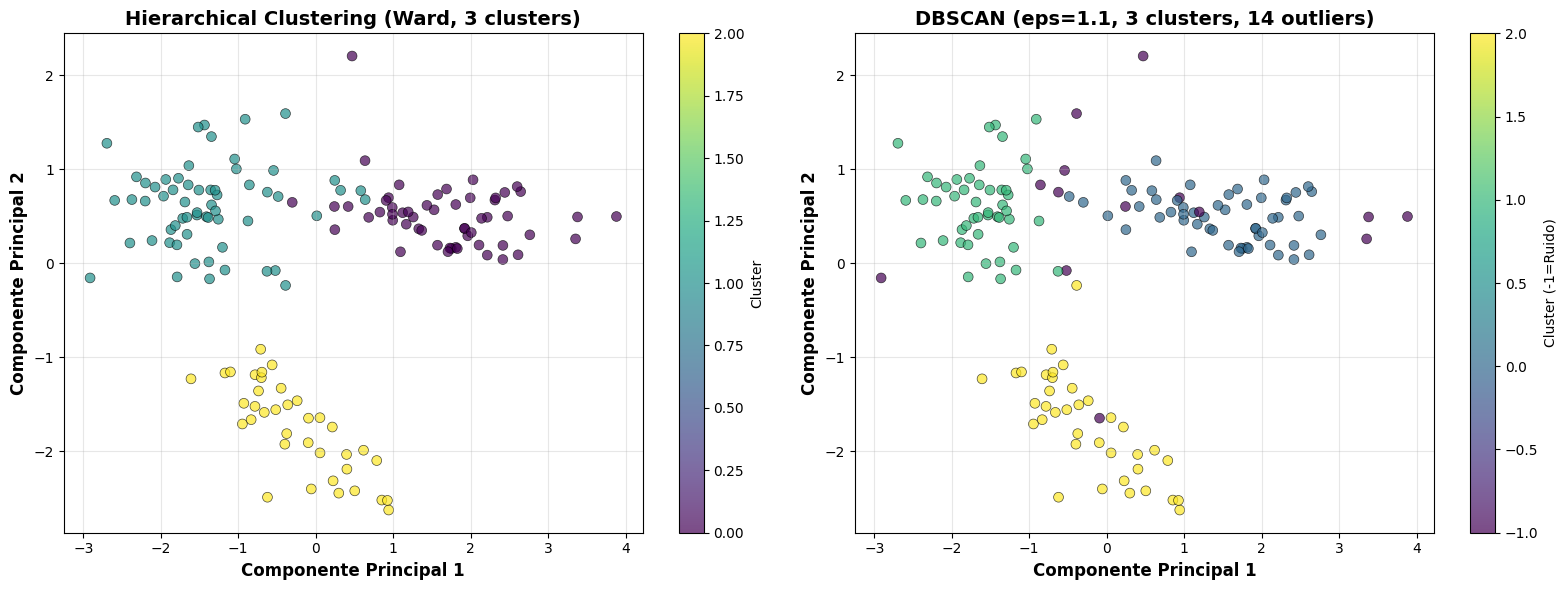


 INTERPRETACIÓN:
   • Puntos del mismo color = mismo cluster
   • DBSCAN: Puntos oscuros = outliers (cluster -1)
   • Observe cómo los clusters se distribuyen en el espacio



In [50]:
# Aplicar PCA para visualización
pca_viz = PCA(n_components=2, random_state=42)
X_pca = pca_viz.fit_transform(X)

print(f"\n PCA para visualización:")
print(f"   Varianza explicada: {pca_viz.explained_variance_ratio_.sum()*100:.2f}%")
print(f"   PC1: {pca_viz.explained_variance_ratio_[0]*100:.2f}%")
print(f"   PC2: {pca_viz.explained_variance_ratio_[1]*100:.2f}%")

# Visualizar ambos clustering
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Hierarchical
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], 
                          c=labels_hc_best, cmap='viridis', 
                          s=50, alpha=0.7, edgecolor='black', linewidth=0.5)
axes[0].set_xlabel('Componente Principal 1', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Componente Principal 2', fontweight='bold', fontsize=12)
axes[0].set_title(f'Hierarchical Clustering (Ward, {best_hc["n_clusters"]} clusters)', 
                 fontweight='bold', fontsize=14)
axes[0].grid(alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# DBSCAN
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], 
                          c=labels_dbscan_final, cmap='viridis', 
                          s=50, alpha=0.7, edgecolor='black', linewidth=0.5)
axes[1].set_xlabel('Componente Principal 1', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Componente Principal 2', fontweight='bold', fontsize=12)
axes[1].set_title(f'DBSCAN (eps={best_dbscan_adjusted["eps"]}, {best_dbscan_adjusted["n_clusters"]} clusters, {best_dbscan_adjusted["n_noise"]} outliers)', 
                 fontweight='bold', fontsize=14)
axes[1].grid(alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster (-1=Ruido)')

plt.tight_layout()
plt.show()

print("""
 INTERPRETACIÓN:
   • Puntos del mismo color = mismo cluster
   • DBSCAN: Puntos oscuros = outliers (cluster -1)
   • Observe cómo los clusters se distribuyen en el espacio
""")

### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [51]:

# Cargar nuevos datos
df_new = pd.read_csv('data/new_experiments.csv', delimiter='|')

In [52]:
# Verificar columnas
print(f"\n COLUMNAS:")
for i, col in enumerate(df_new.columns, 1):
    print(f"   {i}. {col}")

# Verificar que son las mismas que el dataset original
if list(df_new.columns) == list(df.columns):
    print("\n    Columnas coinciden con dataset original")
else:
    print("\n    ADVERTENCIA: Columnas diferentes")
    print(f"      Original: {list(df.columns)}")
    print(f"      Nuevas: {list(df_new.columns)}")

# Primeras filas
print(f"\n Primeras 5 filas de nuevos experimentos:")
print(df_new.head())

# Verificar nulos
print(f"\n VALORES NULOS:")
nulos_new = df_new.isnull().sum()
if nulos_new.sum() == 0:
    print("    Sin valores nulos")
else:
    print(nulos_new[nulos_new > 0])

# Estadísticas
print(f"\n Estadísticas de nuevos experimentos:")
print(df_new.describe())


 COLUMNAS:
   1. Azúcares
   2. Vitamínas del grupo B
   3. Cafeína
   4. Ácido Cítrico
   5. Taurina

    Columnas coinciden con dataset original

 Primeras 5 filas de nuevos experimentos:
   Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina
0  1.481555               0.305159  1.366128       2.239039  0.731870
1  0.616869               0.890014  0.583034       0.312420 -0.665332
2 -1.680724               0.341713 -0.340615      -0.213021 -0.976782
3 -0.284874              -1.412851 -0.782361      -1.193845 -0.717240
4 -0.927212               0.634140 -1.565455      -0.085641 -0.522583

 VALORES NULOS:
    Sin valores nulos

 Estadísticas de nuevos experimentos:
       Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina
count  6.000000               6.000000  6.000000       6.000000  6.000000
mean   0.028059               0.085839 -0.348982       0.106490 -0.032337
std    1.205271               0.826463  1.139233       1.157346  1.143657
min   -1.680724

In [53]:
# Preparar nuevos datos
X_new = df_new.values

print(f"\n DATOS:")
print(f"   Originales: {X.shape}")
print(f"   Nuevos: {X_new.shape}")

# Combinar datos
X_combined = np.vstack([X, X_new])

print(f"   Combinados: {X_combined.shape}")

# Re-entrenar modelo con datos combinados
print(f"\n Re-entrenando Hierarchical Clustering...")

hc_combined = AgglomerativeClustering(
    n_clusters=best_hc['n_clusters'],
    linkage=best_hc['linkage']
)

labels_combined = hc_combined.fit_predict(X_combined)

print(f" Modelo re-entrenado")

# Separar etiquetas
labels_original_combined = labels_combined[:len(X)]
labels_new = labels_combined[len(X):]

print(f"\n ETIQUETAS:")
print(f"   Originales: {labels_original_combined.shape}")
print(f"   Nuevos: {labels_new.shape}")

# Distribucón de nuevos experimentos
print(f"\n SEGMENTACIÓN DE NUEVOS EXPERIMENTOS:")
unique_new, counts_new = np.unique(labels_new, return_counts=True)

for cluster_id, count in zip(unique_new, counts_new):
    pct = (count / len(labels_new)) * 100
    print(f"   Cluster {cluster_id}: {count:3d} experimentos ({pct:5.1f}%)")

# Comparar con distribución original
print(f"\n COMPARACIÓN CON DISTRIBUCIÓN ORIGINAL:")
print(f"\n   {'Cluster':>10s} {'Original':>12s} {'Nuevos':>12s} {'Diferencia':>12s}")
print("   " + "-" * 50)

for cluster_id in range(best_hc['n_clusters']):
    # Contar en originales
    count_orig = np.sum(labels_hc_best == cluster_id)
    pct_orig = (count_orig / len(labels_hc_best)) * 100
    
    # Contar en nuevos
    count_new = np.sum(labels_new == cluster_id)
    pct_new = (count_new / len(labels_new)) * 100 if len(labels_new) > 0 else 0
    
    diff = pct_new - pct_orig
    
    print(f"   {cluster_id:10d} {pct_orig:11.1f}% {pct_new:11.1f}% {diff:+11.1f}%")


 DATOS:
   Originales: (153, 5)
   Nuevos: (6, 5)
   Combinados: (159, 5)

 Re-entrenando Hierarchical Clustering...
 Modelo re-entrenado

 ETIQUETAS:
   Originales: (153,)
   Nuevos: (6,)

 SEGMENTACIÓN DE NUEVOS EXPERIMENTOS:
   Cluster 0:   2 experimentos ( 33.3%)
   Cluster 1:   2 experimentos ( 33.3%)
   Cluster 2:   2 experimentos ( 33.3%)

 COMPARACIÓN CON DISTRIBUCIÓN ORIGINAL:

      Cluster     Original       Nuevos   Diferencia
   --------------------------------------------------
            0        35.9%        33.3%        -2.6%
            1        39.9%        33.3%        -6.5%
            2        24.2%        33.3%        +9.2%


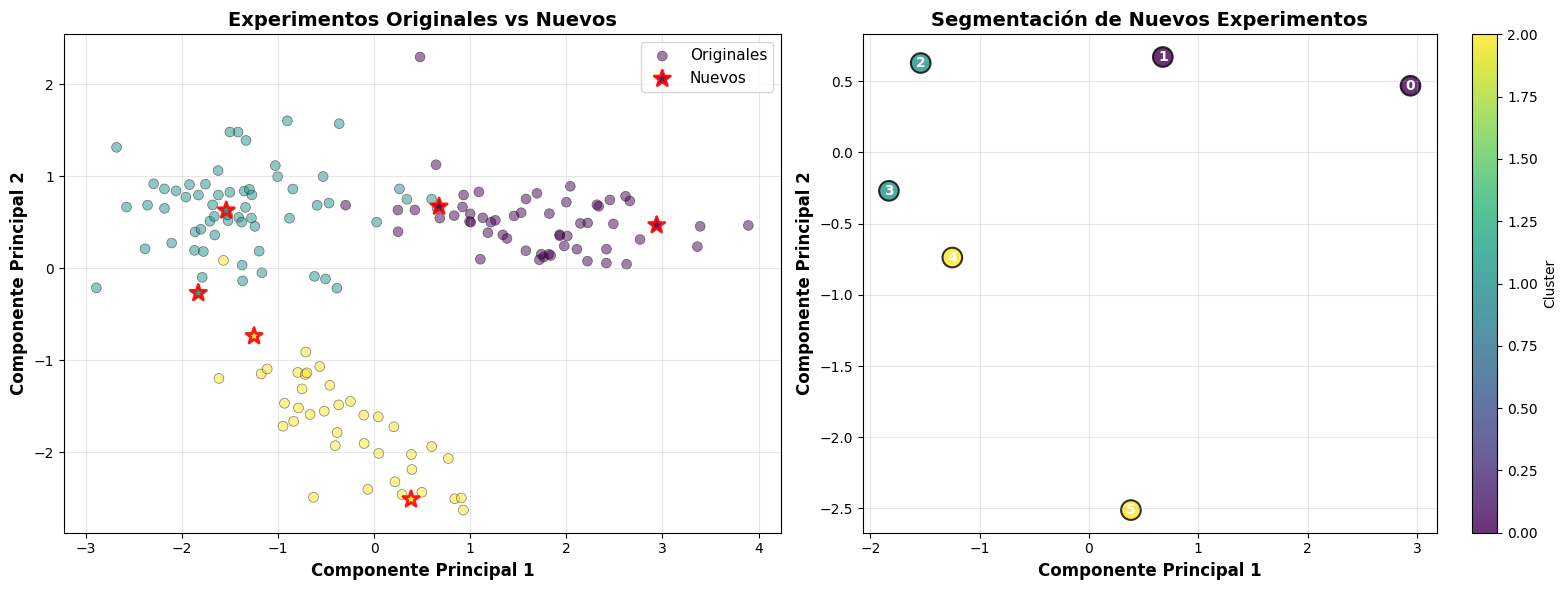

In [54]:
# PCA sobre datos combinados
pca_combined = PCA(n_components=2, random_state=42)
X_combined_pca = pca_combined.fit_transform(X_combined)

# Separar
X_orig_pca = X_combined_pca[:len(X)]
X_new_pca = X_combined_pca[len(X):]

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Todos juntos
axes[0].scatter(X_orig_pca[:, 0], X_orig_pca[:, 1], 
               c=labels_original_combined, cmap='viridis', 
               s=50, alpha=0.5, edgecolor='black', linewidth=0.5,
               label='Originales')
axes[0].scatter(X_new_pca[:, 0], X_new_pca[:, 1], 
               c=labels_new, cmap='viridis', 
               s=150, alpha=0.9, edgecolor='red', linewidth=2,
               marker='*', label='Nuevos')
axes[0].set_xlabel('Componente Principal 1', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Componente Principal 2', fontweight='bold', fontsize=12)
axes[0].set_title('Experimentos Originales vs Nuevos', fontweight='bold', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Gráfico 2: Solo nuevos (más detalle)
scatter2 = axes[1].scatter(X_new_pca[:, 0], X_new_pca[:, 1], 
                          c=labels_new, cmap='viridis', 
                          s=200, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Componente Principal 1', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Componente Principal 2', fontweight='bold', fontsize=12)
axes[1].set_title('Segmentación de Nuevos Experimentos', fontweight='bold', fontsize=14)
axes[1].grid(alpha=0.3)

# Añadir números de experimento
for i in range(len(X_new_pca)):
    axes[1].annotate(f'{i}', (X_new_pca[i, 0], X_new_pca[i, 1]), 
                    fontsize=10, ha='center', va='center', 
                    color='white', fontweight='bold')

plt.colorbar(scatter2, ax=axes[1], label='Cluster')
plt.tight_layout()
plt.show()


In [55]:
# Crear DataFrame con resultados
df_resultados = df_new.copy()
df_resultados['Cluster_Asignado'] = labels_new

print(f"\n TABLA DE RESULTADOS:")
print(df_resultados)

# Estadísticas por cluster
print(f"\n CARACTERÍSTICAS PROMEDIO POR CLUSTER (nuevos experimentos):")
print("\n" + df_resultados.groupby('Cluster_Asignado').mean().to_string())

# Comparar con originales
print(f"\n CARACTERÍSTICAS PROMEDIO POR CLUSTER (originales):")
df_orig_labels = df.copy()
df_orig_labels['Cluster_Asignado'] = labels_hc_best
print("\n" + df_orig_labels.groupby('Cluster_Asignado').mean().to_string())

# Recomendaciones por cluster
print(f"\n" + "="*70)
print("INTERPRETACIÓN Y RECOMENDACIONES PARA LOS QUÍMICOS")
print("="*70)

for cluster_id in range(best_hc['n_clusters']):
    # Nuevos en este cluster
    nuevos_cluster = np.sum(labels_new == cluster_id)
    originales_cluster = np.sum(labels_hc_best == cluster_id)
    
    print(f"\n CLUSTER {cluster_id}:")
    print(f"   Experimentos nuevos: {nuevos_cluster}")
    print(f"   Mezclas originales: {originales_cluster}")
    
    if nuevos_cluster > 0:
        # Características promedio de nuevos en este cluster
        mask_new = labels_new == cluster_id
        caracteristicas_new = df_new[mask_new].mean()
        
        print(f"\n   Características promedio (nuevos experimentos):")
        for col in df_new.columns:
            print(f"      {col:25s}: {caracteristicas_new[col]:7.3f}")
        
        # IDs de experimentos en este cluster
        ids_cluster = np.where(labels_new == cluster_id)[0]
        print(f"\n   IDs de experimentos: {list(ids_cluster)}")


 TABLA DE RESULTADOS:
   Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina  \
0  1.481555               0.305159  1.366128       2.239039  0.731870   
1  0.616869               0.890014  0.583034       0.312420 -0.665332   
2 -1.680724               0.341713 -0.340615      -0.213021 -0.976782   
3 -0.284874              -1.412851 -0.782361      -1.193845 -0.717240   
4 -0.927212               0.634140 -1.565455      -0.085641 -0.522583   
5  0.962743              -0.243142 -1.354622      -0.420013  1.956043   

   Cluster_Asignado  
0                 0  
1                 0  
2                 1  
3                 1  
4                 2  
5                 2  

 CARACTERÍSTICAS PROMEDIO POR CLUSTER (nuevos experimentos):

                  Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina
Cluster_Asignado                                                                    
0                 1.049212               0.597587  0.974581       1.275730  0.

In [56]:
# Guardar tabla de resultados
output_path = 'data/nuevos_experimentos_segmentados.csv'
df_resultados.to_csv(output_path, index=False, sep='|')


### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.